deadline: 02.February 2022 12 PM. 

general tasks for this assignment are:

  - Import the dataset and prepare the data for the models (preferably using an automated loop)
  - use all 5 cryptocurrencies
  - Generate feature variables from the data sets
  - Design neural networks which fit the task you are facing (predicting the target variable)
  - automatic optimization of the networks (for example with cross-validation, hyperparameter tuning, etc.)

dataset: [Kaggle](https://www.kaggle.com/c/g-research-crypto-forecasting)






# Team information

|Team-number :| 15|
|:----:|:----:|


|Name|    E-Mail        |matriculation-nr.|
|:----:|:----:|:----:|
|Usmani Sababa Saad| usmani01@ads.uni-passau.de|109409|
|Stegner Maria| stegne03@uni-passau.de|107552|
|Michael Haas| haas38@ads.uni-passau.de|78887|

# Data Import

In the following chapter we will import the basic data set. 

To do so we are using: 

> The os package, which provides a portable way of using operating system dependent functionality. This is necessary as we are going to manipulate file paths in order to read the data.

> The numpy packge, which provides operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, basic linear algebra and much more. We use this in this section especially to define datatypes for our datasample.

> The pandas package, which is usually used for data analysis and manipulation. This package allows us to read the csv file, to transform our index into datetime format and to merge different datasets.

In the first step we need to import the data by using pandas. Therefore we initially set the directory variable to the folder that contains our data and afterwards use os.path.join to join the dataset_name with the directory link. Before reading the dataset we define the datatypes using np.int and np.float, then we read the csv data and pass the datatypes to the dtype parameter. 

Since the timestamps are in seconds since the first of january 1970, we create a column in our datasample that contains the date in a datetime format. 

After preparing the dataset with the training data we also read the asset_details with pandas in the same fashion as before.

In the end we merge both dataframes on the basis of the Asset_ID column. 

In [2]:
import os
import numpy as np
import pandas as pd

#import data
directory = "/Users/mariastegner/Documents/Master/1. Semester" 
file_path = os.path.join(directory, 'train.csv')
dtypes={
    'timestamp': np.int64,
    'Asset_ID': np.int8,
    'Count': np.int32,
    'Open': np.float64,
    'High': np.float64,
    'Low': np.float64,
    'Close': np.float64,
    'Volume': np.float64,
    'VWAP': np.float64,
    'Target': np.float64,
}
data = pd.read_csv(file_path, dtype=dtypes, usecols=list(dtypes.keys()))
data ['Time']=pd.to_datetime(data['timestamp'], unit='s')

file_path = os.path.join(directory, 'asset_details.csv')
details = pd.read_csv(file_path)

data = pd.merge(data, 
                details, 
                on ="Asset_ID",
                how = 'left')

We also split the data set so that we only work with the data that is available unti 31-05-2021 and use the data beginning at 01-06-2021 to predict and evaluate the models.

In [2]:
data.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,Weight,Asset_Name
0,1514764860,2,40,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00,2.397895,Bitcoin Cash
1,1514764860,0,5,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 00:01:00,4.304065,Binance Coin
2,1514764860,1,229,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00,6.779922,Bitcoin
3,1514764860,5,32,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 00:01:00,1.386294,EOS.IO
4,1514764860,7,5,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 00:01:00,2.079442,Ethereum Classic


In [ ]:
data_eval = data[data.timestamp >= 1622505660]
data = data[data.timestamp < 1622505660]

Creating a dataset for bitcoin. Setting the timestamp as the new index in order to calculate the minutes without data. Next row shows the calculation and shows that 74 times there's 120 seconds between timestamps, so one minute missing, 12 times there are 180 seconds inbetween, so two minutes missing, and so on. Missing asset data, for a given minute, is not represented by NaN's, but instead by the absence of those rows. We can check the timestamp difference between consecutive rows to see if there is missing data.

In [4]:
btc=data[data["Asset_ID"]==1]
btc=btc.set_index("timestamp")
btc.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,Weight,Asset_Name
timestamp,,,,,,,,,,,,
1514764860,1,229,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00,6.779922,Bitcoin
1514764920,1,235,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,2018-01-01 00:02:00,6.779922,Bitcoin
1514764980,1,528,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,2018-01-01 00:03:00,6.779922,Bitcoin
1514765040,1,435,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,2018-01-01 00:04:00,6.779922,Bitcoin
1514765100,1,742,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,2018-01-01 00:05:00,6.779922,Bitcoin


In [5]:
(btc.index[1:]-btc.index[:-1]).value_counts().head()

60     1794863
120         74
180         12
240         11
420          9
Name: timestamp, dtype: int64

Notice that there are many gaps in the data. To work with most time series models, we should preprocess our data into a format without time gaps. To fill the gaps, we can use the .reindex() method for forward filling, filling gaps with the previous valid value.
The same procedure is done for the cryptocurrency Ethereum.

In [6]:
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')

In [7]:
eth=data[data["Asset_ID"]==6]
eth=eth.set_index("timestamp")
eth.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,Weight,Asset_Name
timestamp,,,,,,,,,,,,
1514764860,6,173,738.3025,746.00,732.51,738.5075,335.987856,738.839291,-0.004809,2018-01-01 00:01:00,5.894403,Ethereum
1514764920,6,192,738.5075,745.14,732.49,738.2600,232.793141,738.268967,-0.004441,2018-01-01 00:02:00,5.894403,Ethereum
1514764980,6,120,738.3325,745.12,730.00,737.5025,174.138031,737.994457,-0.004206,2018-01-01 00:03:00,5.894403,Ethereum
1514765040,6,156,737.2225,744.69,728.93,737.1025,165.383926,737.303631,-0.002205,2018-01-01 00:04:00,5.894403,Ethereum
1514765100,6,118,736.5300,743.80,727.11,735.7050,193.078039,736.163026,-0.001744,2018-01-01 00:05:00,5.894403,Ethereum


In [8]:
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60     1794770
120         96
180         23
300          5
540          4
Name: timestamp, dtype: int64

In [9]:
eth=eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')

In [10]:
(btc.index[1:]-btc.index[:-1]).value_counts().head()

60    1795678
Name: timestamp, dtype: int64

In [11]:
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60    1795678
Name: timestamp, dtype: int64

In [12]:
btc.isna().sum()

Asset_ID        0
Count           0
Open            0
High            0
Low             0
Close           0
Volume          0
VWAP            0
Target        921
Time            0
Weight          0
Asset_Name      0
dtype: int64

In [13]:
eth.isna().sum()

Asset_ID         0
Count            0
Open             0
High             0
Low              0
Close            0
Volume           0
VWAP             0
Target        1040
Time             0
Weight           0
Asset_Name       0
dtype: int64

In [14]:
btc.dropna(inplace=True)
eth.dropna(inplace=True)

In [15]:
training_fraction = 0.7
training_size_btc = int(np.floor(len(btc) * training_fraction))
training_size_eth = int(np.floor(len(eth) * training_fraction))

btc_train, btc_test = btc[:training_size_btc], btc[training_size_btc:]
eth_train, eth_test = eth[:training_size_eth], eth[training_size_eth:]

In [16]:
!pip install ta

In [17]:
import ta

btc_train = ta.add_all_ta_features(btc_train, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=False)

/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_adi"] = AccDistIndexIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_obv"] = OnBalanceVolumeIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [18]:
btc_test = ta.add_all_ta_features(btc_test, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=False)

/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_adi"] = AccDistIndexIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_obv"] = OnBalanceVolumeIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [20]:
btc_train.tail()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
timestamp,,,,,,,,,,,,,,,,,,,,,
1590197700,1,686,9250.282857,9265.40,9246.30,9251.397143,67.136239,9252.330850,0.000088,2020-05-23 01:35:00,...,0.005233,0.001500,0.003734,-14.176878,-12.443289,-1.733589,9245.870046,0.023611,0.023608,-33.203758
1590197760,1,470,9250.968571,9261.00,9246.34,9252.784286,55.176744,9251.298090,0.000435,2020-05-23 01:36:00,...,0.010905,0.003381,0.007524,-13.535417,-12.661715,-0.873703,9246.041321,0.014994,0.014993,-33.193742
1590197820,1,617,9252.127181,9261.00,9242.79,9248.111429,81.938926,9249.642933,0.000523,2020-05-23 01:37:00,...,0.011192,0.004943,0.006249,-9.318720,-11.993116,2.674396,9246.095564,-0.050502,-0.050515,-33.227481
1590197880,1,627,9247.697143,9256.85,9235.89,9243.997143,29.272370,9245.113786,0.000956,2020-05-23 01:38:00,...,0.007740,0.005502,0.002238,-12.912589,-12.177010,-0.735579,9246.049318,-0.044488,-0.044498,-33.257186
1590197940,1,405,9244.700000,9251.10,9236.35,9242.451429,31.751516,9243.244197,0.000497,2020-05-23 01:39:00,...,0.003614,0.005125,-0.001511,-15.536603,-12.848929,-2.687674,9245.942363,-0.016721,-0.016723,-33.268347


In [21]:
btc_test.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
timestamp,,,,,,,,,,,,,,,,,,,,,
1590198000,1,407,9242.502857,9253.22,9235.780000,9242.228571,23.581999,9242.252275,0.000518,2020-05-23 01:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.796189,NaN,0.000000
1590198060,1,519,9241.805714,9250.00,9234.310000,9240.548571,40.679125,9241.267278,0.000757,2020-05-23 01:41:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018177,-0.018179,-0.018177
1590198120,1,841,9239.482857,9247.20,9228.200000,9235.690000,48.946060,9236.344952,0.000598,2020-05-23 01:42:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.052579,-0.052593,-0.070747
1590198180,1,523,9236.699672,9244.26,9229.228035,9236.190767,24.814314,9237.313273,0.000506,2020-05-23 01:43:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005422,0.005422,-0.065328
1590198240,1,446,9235.702857,9244.26,9231.230000,9239.231429,31.754735,9237.642714,-0.000388,2020-05-23 01:44:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032921,0.032916,-0.032429


In [27]:
btc_ = btc_train.merge(btc_test, how='outer')

In [29]:
btc_[len(btc_train)-1:len(btc_train)+4]

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
1256329,1,405,9244.700000,9251.10,9236.350000,9242.451429,31.751516,9243.244197,0.000497,2020-05-23 01:39:00,...,0.003614,0.005125,-0.001511,-15.536603,-12.848929,-2.687674,9245.942363,-0.016721,-0.016723,-33.268347
1256330,1,407,9242.502857,9253.22,9235.780000,9242.228571,23.581999,9242.252275,0.000518,2020-05-23 01:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.796189,NaN,0.000000
1256331,1,519,9241.805714,9250.00,9234.310000,9240.548571,40.679125,9241.267278,0.000757,2020-05-23 01:41:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018177,-0.018179,-0.018177
1256332,1,841,9239.482857,9247.20,9228.200000,9235.690000,48.946060,9236.344952,0.000598,2020-05-23 01:42:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.052579,-0.052593,-0.070747
1256333,1,523,9236.699672,9244.26,9229.228035,9236.190767,24.814314,9237.313273,0.000506,2020-05-23 01:43:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005422,0.005422,-0.065328


In [31]:
file_name = 'btc.csv'
btc_.to_csv(directory + '/' + file_name, sep=';')

In [32]:
eth_train = ta.add_all_ta_features(eth_train, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=False)

/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_adi"] = AccDistIndexIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_obv"] = OnBalanceVolumeIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [33]:
eth_test = ta.add_all_ta_features(eth_test, open='Open', high='High', low='Low', close='Close', volume='Volume', fillna=False)

/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_adi"] = AccDistIndexIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{colprefix}volume_obv"] = OnBalanceVolumeIndicator(
/Users/mariastegner/opt/anaconda3/lib/python3.8/site-packages/ta/wrapper.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [34]:
eth_ = eth_train.merge(eth_test, how='outer')

In [35]:
eth_[len(eth_train)-1:len(eth_train)+4]

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
1256246,6,181,208.939044,209.11,208.76,208.857378,297.833290,208.881394,0.000933,2020-05-23 02:01:00,...,-0.003221,-0.008758,0.005537,-12.816043,-17.539674,4.723631,208.871972,-0.049402,-0.049415,-71.718990
1256247,6,150,208.857378,209.04,208.74,208.867378,283.743839,208.846916,0.001712,2020-05-23 02:02:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.930082,NaN,0.000000
1256248,6,614,208.947752,209.42,208.79,209.258571,2435.040927,209.129840,0.001666,2020-05-23 02:03:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.187293,0.187118,0.187293
1256249,6,521,209.283318,209.62,209.20,209.398571,1485.165860,209.354747,-0.000131,2020-05-23 02:04:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066903,0.066881,0.254321
1256250,6,3414,209.391429,210.31,209.32,210.166512,18392.243220,209.910180,-0.001275,2020-05-23 02:05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366736,0.366065,0.621990


In [36]:
file_name_2 = 'eth.csv'
eth_.to_csv(directory + '/' + file_name_2, sep=';')

In [42]:
btc_features_ = btc_.drop(['Asset_ID', 'Time', 'Weight', 'Asset_Name'], axis=1)
eth_features_ = eth_.drop(['Asset_ID', 'Time', 'Weight', 'Asset_Name'], axis=1)

In [43]:
btc_features_ = btc_features_.drop(btc_features_.columns[btc_features_.isnull().sum()> 100], axis=1)
eth_features_ = eth_features_.drop(eth_features_.columns[eth_features_.isnull().sum()> 100], axis=1)

In [48]:
corr_features_btc_ = btc_features_.drop(['Count', 'High', 'Low', 'Open', 'Close', 'Volume', 'VWAP'], axis=1).corr()['Target'].abs().sort_values(ascending=False)
corr_features_btc_[:21]

Target                   1.000000
volatility_bbp           0.035579
trend_cci                0.033968
momentum_ppo_hist        0.031871
volatility_dcp           0.030375
momentum_rsi             0.028770
momentum_stoch_rsi       0.028222
momentum_roc             0.028074
momentum_stoch           0.028053
momentum_wr              0.028053
momentum_stoch_rsi_k     0.026196
others_dlr               0.025412
momentum_stoch_signal    0.025108
others_dr                0.023742
momentum_stoch_rsi_d     0.023280
trend_vortex_ind_pos     0.022793
volatility_kcp           0.022118
trend_vortex_ind_diff    0.021653
momentum_pvo             0.021478
trend_kst_diff           0.021427
trend_aroon_ind          0.021359
Name: Target, dtype: float64

In [70]:
def create_ta_btc(df):
    df['volatility_bbp'] = ta.volatility.bollinger_pband(close=df['Close'])
    df['trend_cci'] = ta.trend.cci(high=df['High'], low=df['Low'], close=df['Close'])
    df['momentum_ppo_hist'] = ta.momentum.ppo_hist(close=df['Close'])
    df['volatility_dcp'] = ta.volatility.donchian_channel_pband(high=df['High'], low=df['Low'], close=df['Close'])
    df['momentum_rsi'] = ta.momentum.rsi(close=df['Close'])
    df['momentum_stoch_rsi'] = ta.momentum.stochrsi(close=df['Close'])
    df['momentum_roc'] = ta.momentum.roc(close=df['Close'])
    df['momentum_stoch'] = ta.momentum.stoch(high=df['High'], low=df['Low'], close=df['Close'])
    df['momentum_wr'] = ta.momentum.williams_r(high=df['High'], low=df['Low'], close=df['Close'])
    df['momentum_stoch_rsi_k'] = ta.momentum.stochrsi_k(close=df['Close'])
    df['others_dlr'] = ta.others.daily_log_return(close=df['Close'])
    df['momentum_stoch_signal'] = ta.momentum.stoch_signal(high=df['High'], low=df['Low'], close=df['Close'])
    df['others_dr'] = ta.others.daily_return(close=df['Close'])
    df['momentum_stoch_rsi_d'] = ta.momentum.stochrsi_d(close=df['Close'])
    df['trend_vortex_ind_pos'] = ta.trend.vortex_indicator_pos(high=df['High'], low=df['Low'], close=df['Close'])
    df['volatility_kcp'] = ta.volatility.keltner_channel_pband(high=df['High'], low=df['Low'], close=df['Close'])
    #df['trend_vortex_ind_diff'] = ta.trend.vortex_indicator_neg(high=df['High'], low=df['Low'], close=df['Close'])
    df['momentum_pvo'] = ta.momentum.pvo(volume=df['Volume'])
    #df['trend_kst_diff'] = ta.trend.kst_sig(close=df['Close'])
    #df['trend_aroon_ind'] = ta.trend.aroon_down(close=df['Close'])

In [ ]:
create_ta_btc(btc)

In [76]:
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low

log_return = lambda asset: np.log(asset).diff(periods=1)

def create_features(df):
    df['close_1'] = df.Close.diff()
    df['close_15'] = df.Close.diff(15)
    df['close_60'] = df.Close.diff(60)

    df['count_1'] = df.Count.diff()
    df['count_15'] = df.Count.diff(15)
    df['count_60'] = df.Count.diff(60)

    df['volume_1'] = df.Volume.diff()
    df['volume_15'] = df.Volume.diff(15)
    df['volume_60'] = df.Volume.diff(60)

    df['upper_shadow'] = upper_shadow(df)
    df['lower_shadow'] = lower_shadow(df)

    df['log_returns'] = log_return(df.Close)[:]


In [77]:
create_features(btc)
btc.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,...,close_60,count_1,count_15,count_60,volume_1,volume_15,volume_60,upper_shadow,lower_shadow,log_returns
timestamp,,,,,,,,,,,,,,,,,,,,,
1514764860,1,229,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.624,169.084,NaN
1514764920,1,235,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,2018-01-01 00:02:00,...,NaN,6.0,NaN,NaN,-0.503629,NaN,NaN,217.264,148.102,-0.001595
1514764980,1,528,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,2018-01-01 00:03:00,...,NaN,293.0,NaN,NaN,24.015388,NaN,NaN,176.500,200.314,-0.001939
1514765040,1,435,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,2018-01-01 00:04:00,...,NaN,-93.0,NaN,NaN,-16.281291,NaN,NaN,196.488,191.760,-0.002414
1514765100,1,742,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,2018-01-01 00:05:00,...,NaN,307.0,NaN,NaN,69.721107,NaN,NaN,189.900,170.474,-0.003137


In [78]:
btc = btc.drop(btc.columns[btc.isnull().sum()> 100], axis=1)
btc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794758 entries, 1514764860 to 1622505540
Data columns (total 41 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Asset_ID               int8          
 1   Count                  int32         
 2   Open                   float64       
 3   High                   float64       
 4   Low                    float64       
 5   Close                  float64       
 6   Volume                 float64       
 7   VWAP                   float64       
 8   Target                 float64       
 9   Time                   datetime64[ns]
 10  Weight                 float64       
 11  Asset_Name             object        
 12  volatility_bbp         float64       
 13  trend_cci              float64       
 14  momentum_ppo_hist      float64       
 15  volatility_dcp         float64       
 16  momentum_rsi           float64       
 17  momentum_stoch_rsi     float64       
 18  momentum_r

In [82]:
corr_features_btc = btc.drop(['Asset_ID', 'Time', 'Weight', 'Asset_Name'], axis=1).corr()['Target'].abs().sort_values(ascending=False)
corr_features_btc[1:21]

volatility_bbp           0.035572
trend_cci                0.033961
momentum_ppo_hist        0.031871
momentum_rsi             0.028771
momentum_stoch_rsi       0.028219
momentum_roc             0.028073
momentum_stoch           0.028053
momentum_wr              0.028053
momentum_stoch_rsi_k     0.026193
others_dr                0.025527
others_dlr               0.025412
log_returns              0.025412
volatility_dcp           0.025139
momentum_stoch_signal    0.025106
volatility_kcp           0.023433
momentum_stoch_rsi_d     0.023275
trend_vortex_ind_pos     0.022791
momentum_pvo             0.021487
volume_60                0.018373
Volume                   0.016050
Name: Target, dtype: float64

In [85]:
btc_features = btc[list(corr_features_btc[:21].index)]
btc_features.head()

,Target,volatility_bbp,trend_cci,momentum_ppo_hist,momentum_rsi,momentum_stoch_rsi,momentum_roc,momentum_stoch,momentum_wr,momentum_stoch_rsi_k,...,others_dlr,log_returns,volatility_dcp,momentum_stoch_signal,volatility_kcp,momentum_stoch_rsi_d,trend_vortex_ind_pos,momentum_pvo,volume_60,Volume
timestamp,,,,,,,,,,,,,,,,,,,,,
1514764860,-0.014643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.509799,NaN,NaN,NaN,NaN,31.550062
1514764920,-0.015037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.159504,-0.001595,NaN,NaN,0.471788,NaN,NaN,NaN,NaN,31.046432
1514764980,-0.010309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.193909,-0.001939,NaN,NaN,0.458106,NaN,NaN,NaN,NaN,55.061820
1514765040,-0.008999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.241384,-0.002414,NaN,NaN,0.432988,NaN,NaN,NaN,NaN,38.780529
1514765100,-0.008079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.313724,-0.003137,NaN,NaN,0.397262,NaN,NaN,NaN,NaN,108.501637


In [86]:
corr_features_eth_ = eth_features_.drop(['Count', 'High', 'Low', 'Open', 'Close', 'Volume', 'VWAP'], axis=1).corr()['Target'].abs().sort_values(ascending=False)
corr_features_eth_[:21]

Target                   1.000000
momentum_roc             0.044614
momentum_ppo_hist        0.037666
momentum_ppo             0.036008
others_dlr               0.030594
momentum_rsi             0.026767
volatility_bbp           0.026699
volatility_ui            0.026601
momentum_ppo_signal      0.026155
trend_kst_diff           0.026098
others_dr                0.025973
trend_cci                0.025683
volatility_kcp           0.025187
volume_vpt               0.025123
trend_trix               0.024709
momentum_pvo             0.024606
trend_vortex_ind_pos     0.024312
volatility_dcp           0.024043
trend_vortex_ind_diff    0.023099
trend_kst                0.022660
momentum_stoch           0.022497
Name: Target, dtype: float64

In [87]:
def create_ta_eth(df):
    df['momentum_roc'] = ta.momentum.roc(close=df['Close'])
    df['momentum_ppo_hist'] = ta.momentum.ppo_hist(close=df['Close'])
    df['momentum_ppo'] = ta.momentum.ppo(close=df['Close'])
    df['others_dlr'] = ta.others.daily_log_return(close=df['Close'])
    df['momentum_rsi'] = ta.momentum.rsi(close=df['Close'])
    df['volatility_bbp'] = ta.volatility.bollinger_pband(close=df['Close'])
    df['volatility_ui'] = ta.volatility.ulcer_index(close=df['Close'])
    df['momentum_ppo_signal'] = ta.momentum.ppo_signal(close=df['Close'])
    df['others_dr'] = ta.others.daily_return(close=df['Close'])
    df['trend_cci'] = ta.trend.cci(high=df['High'], low=df['Low'], close=df['Close'])
    df['volatility_kcp'] = ta.volatility.keltner_channel_pband(high=df['High'], low=df['Low'], close=df['Close'])
    df['volume_vpt'] = ta.volume.volume_price_trend(close=df['Close'], volume=df['Volume'])
    df['trend_trix'] = ta.trend.trix(close=df['Close'])
    df['momentum_pvo'] = ta.momentum.pvo(volume=df['Volume'])
    df['trend_vortex_ind_pos'] = ta.trend.vortex_indicator_pos(high=df['High'], low=df['Low'], close=df['Close'])
    df['volatility_dcp'] = ta.volatility.donchian_channel_pband(high=df['High'], low=df['Low'], close=df['Close'])
    df['trend_kst'] = ta.trend.kst(close=df['Close'])
    df['momentum_stoch'] = ta.momentum.stoch(high=df['High'], low=df['Low'], close=df['Close'])

In [ ]:
create_ta_eth(eth)

In [89]:
create_features(eth)
eth.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Time,...,close_60,count_1,count_15,count_60,volume_1,volume_15,volume_60,upper_shadow,lower_shadow,log_returns
timestamp,,,,,,,,,,,,,,,,,,,,,
1514764860,6,173,738.3025,746.00,732.51,738.5075,335.987856,738.839291,-0.004809,2018-01-01 00:01:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.4925,5.7925,NaN
1514764920,6,192,738.5075,745.14,732.49,738.2600,232.793141,738.268967,-0.004441,2018-01-01 00:02:00,...,NaN,19.0,NaN,NaN,-103.194715,NaN,NaN,6.6325,5.7700,-0.000335
1514764980,6,120,738.3325,745.12,730.00,737.5025,174.138031,737.994457,-0.004206,2018-01-01 00:03:00,...,NaN,-72.0,NaN,NaN,-58.655110,NaN,NaN,6.7875,7.5025,-0.001027
1514765040,6,156,737.2225,744.69,728.93,737.1025,165.383926,737.303631,-0.002205,2018-01-01 00:04:00,...,NaN,36.0,NaN,NaN,-8.754106,NaN,NaN,7.4675,8.1725,-0.000543
1514765100,6,118,736.5300,743.80,727.11,735.7050,193.078039,736.163026,-0.001744,2018-01-01 00:05:00,...,NaN,-38.0,NaN,NaN,27.694113,NaN,NaN,7.2700,8.5950,-0.001898


In [90]:
eth = eth.drop(eth.columns[eth.isnull().sum()> 100], axis=1)
eth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794639 entries, 1514764860 to 1622505540
Data columns (total 42 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Asset_ID              int8          
 1   Count                 int32         
 2   Open                  float64       
 3   High                  float64       
 4   Low                   float64       
 5   Close                 float64       
 6   Volume                float64       
 7   VWAP                  float64       
 8   Target                float64       
 9   Time                  datetime64[ns]
 10  Weight                float64       
 11  Asset_Name            object        
 12  momentum_roc          float64       
 13  momentum_ppo_hist     float64       
 14  momentum_ppo          float64       
 15  others_dlr            float64       
 16  momentum_rsi          float64       
 17  volatility_bbp        float64       
 18  volatility_ui         float64 

In [91]:
corr_features_eth = eth.drop(['Asset_ID', 'Time', 'Weight', 'Asset_Name'], axis=1).corr()['Target'].abs().sort_values(ascending=False)
corr_features_eth[1:21]

momentum_roc            0.044620
momentum_ppo_hist       0.037672
momentum_ppo            0.036011
Volume                  0.033656
others_dr               0.030753
log_returns             0.030594
others_dlr              0.030594
volume_60               0.027374
momentum_rsi            0.026776
volatility_bbp          0.026704
volatility_ui           0.026603
volume_15               0.026500
volatility_kcp          0.026469
momentum_ppo_signal     0.026157
trend_kst               0.025975
trend_cci               0.025688
volume_vpt              0.025100
trend_trix              0.024713
momentum_pvo            0.024593
trend_vortex_ind_pos    0.024324
Name: Target, dtype: float64

In [93]:
eth_features = eth[list(corr_features_eth[:21].index)]
eth_features.head()

,Target,momentum_roc,momentum_ppo_hist,momentum_ppo,Volume,others_dr,log_returns,others_dlr,volume_60,momentum_rsi,...,volatility_ui,volume_15,volatility_kcp,momentum_ppo_signal,trend_kst,trend_cci,volume_vpt,trend_trix,momentum_pvo,trend_vortex_ind_pos
timestamp,,,,,,,,,,,,,,,,,,,,,
1514764860,-0.004809,NaN,NaN,NaN,335.987856,40.061416,NaN,NaN,NaN,NaN,...,NaN,NaN,0.481530,NaN,NaN,NaN,134.473257,NaN,NaN,NaN
1514764920,-0.004441,NaN,NaN,NaN,232.793141,-0.033514,-0.000335,-0.033519,NaN,NaN,...,NaN,NaN,0.478657,NaN,NaN,NaN,134.523476,NaN,NaN,NaN
1514764980,-0.004206,NaN,NaN,NaN,174.138031,-0.102606,-0.001027,-0.102659,NaN,NaN,...,NaN,NaN,0.467654,NaN,NaN,NaN,-0.256694,NaN,NaN,NaN
1514765040,-0.002205,NaN,NaN,NaN,165.383926,-0.054237,-0.000543,-0.054252,NaN,NaN,...,NaN,NaN,0.467782,NaN,NaN,NaN,-0.268376,NaN,NaN,NaN
1514765100,-0.001744,NaN,NaN,NaN,193.078039,-0.189594,-0.001898,-0.189774,NaN,NaN,...,NaN,NaN,0.438289,NaN,NaN,NaN,-0.455763,NaN,NaN,NaN


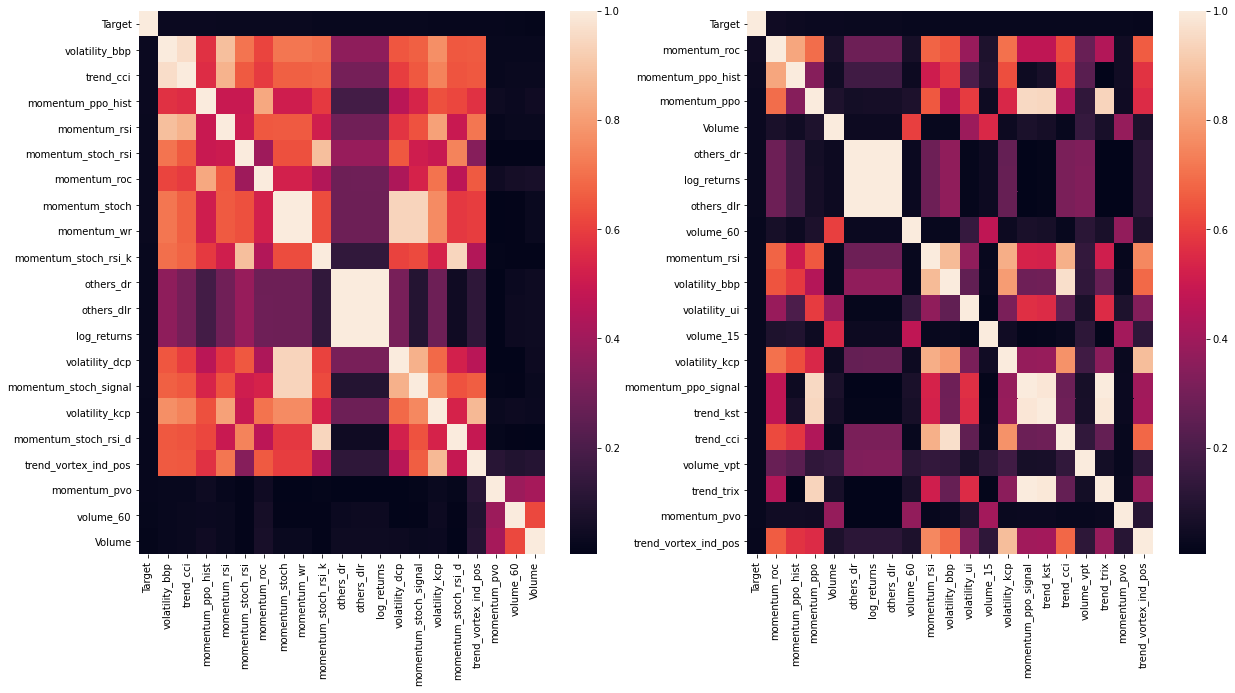

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize = (20, 10))
sns.heatmap(btc_features.corr().abs(), ax = axs[0])
sns.heatmap(eth_features.corr().abs(), ax = axs[1])
plt.show()

In [98]:
from sklearn.model_selection import TimeSeriesSplit

X_btc = btc_features.drop(['Target'], axis=1)
y_btc = btc_features['Target'].values

tscv = TimeSeriesSplit(n_splits=3)
btc_splits = list(tscv.split(X_btc))
btc_splits

[(array([     0,      1,      2, ..., 448688, 448689, 448690]),
  array([448691, 448692, 448693, ..., 897377, 897378, 897379])),
 (array([     0,      1,      2, ..., 897377, 897378, 897379]),
  array([ 897380,  897381,  897382, ..., 1346066, 1346067, 1346068])),
 (array([      0,       1,       2, ..., 1346066, 1346067, 1346068]),
  array([1346069, 1346070, 1346071, ..., 1794755, 1794756, 1794757]))]

In [99]:
X_eth = eth_features.drop(['Target'], axis=1)
y_eth = eth_features['Target'].values

eth_splits =list(tscv.split(X_eth))
eth_splits

[(array([     0,      1,      2, ..., 448659, 448660, 448661]),
  array([448662, 448663, 448664, ..., 897318, 897319, 897320])),
 (array([     0,      1,      2, ..., 897318, 897319, 897320]),
  array([ 897321,  897322,  897323, ..., 1345977, 1345978, 1345979])),
 (array([      0,       1,       2, ..., 1345977, 1345978, 1345979]),
  array([1345980, 1345981, 1345982, ..., 1794636, 1794637, 1794638]))]

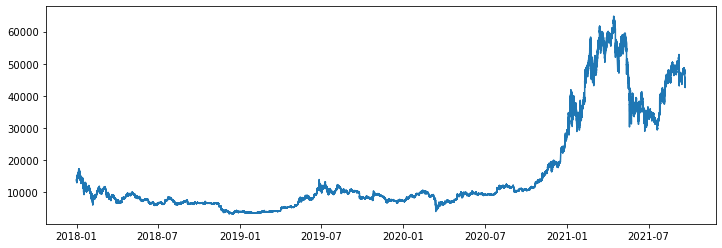

In [4]:
btc = data[data.Asset_ID == 1]
btc.set_index('timestamp', inplace = True)
btc = btc.reindex(range(btc.index[0], btc.index[-1] + 60, 60), method = 'pad')
btc.sort_index(inplace = True)

fig, ax = plt.subplots(figsize = (12, 4))

ax.plot(btc.Time, btc.Close)
plt.show()

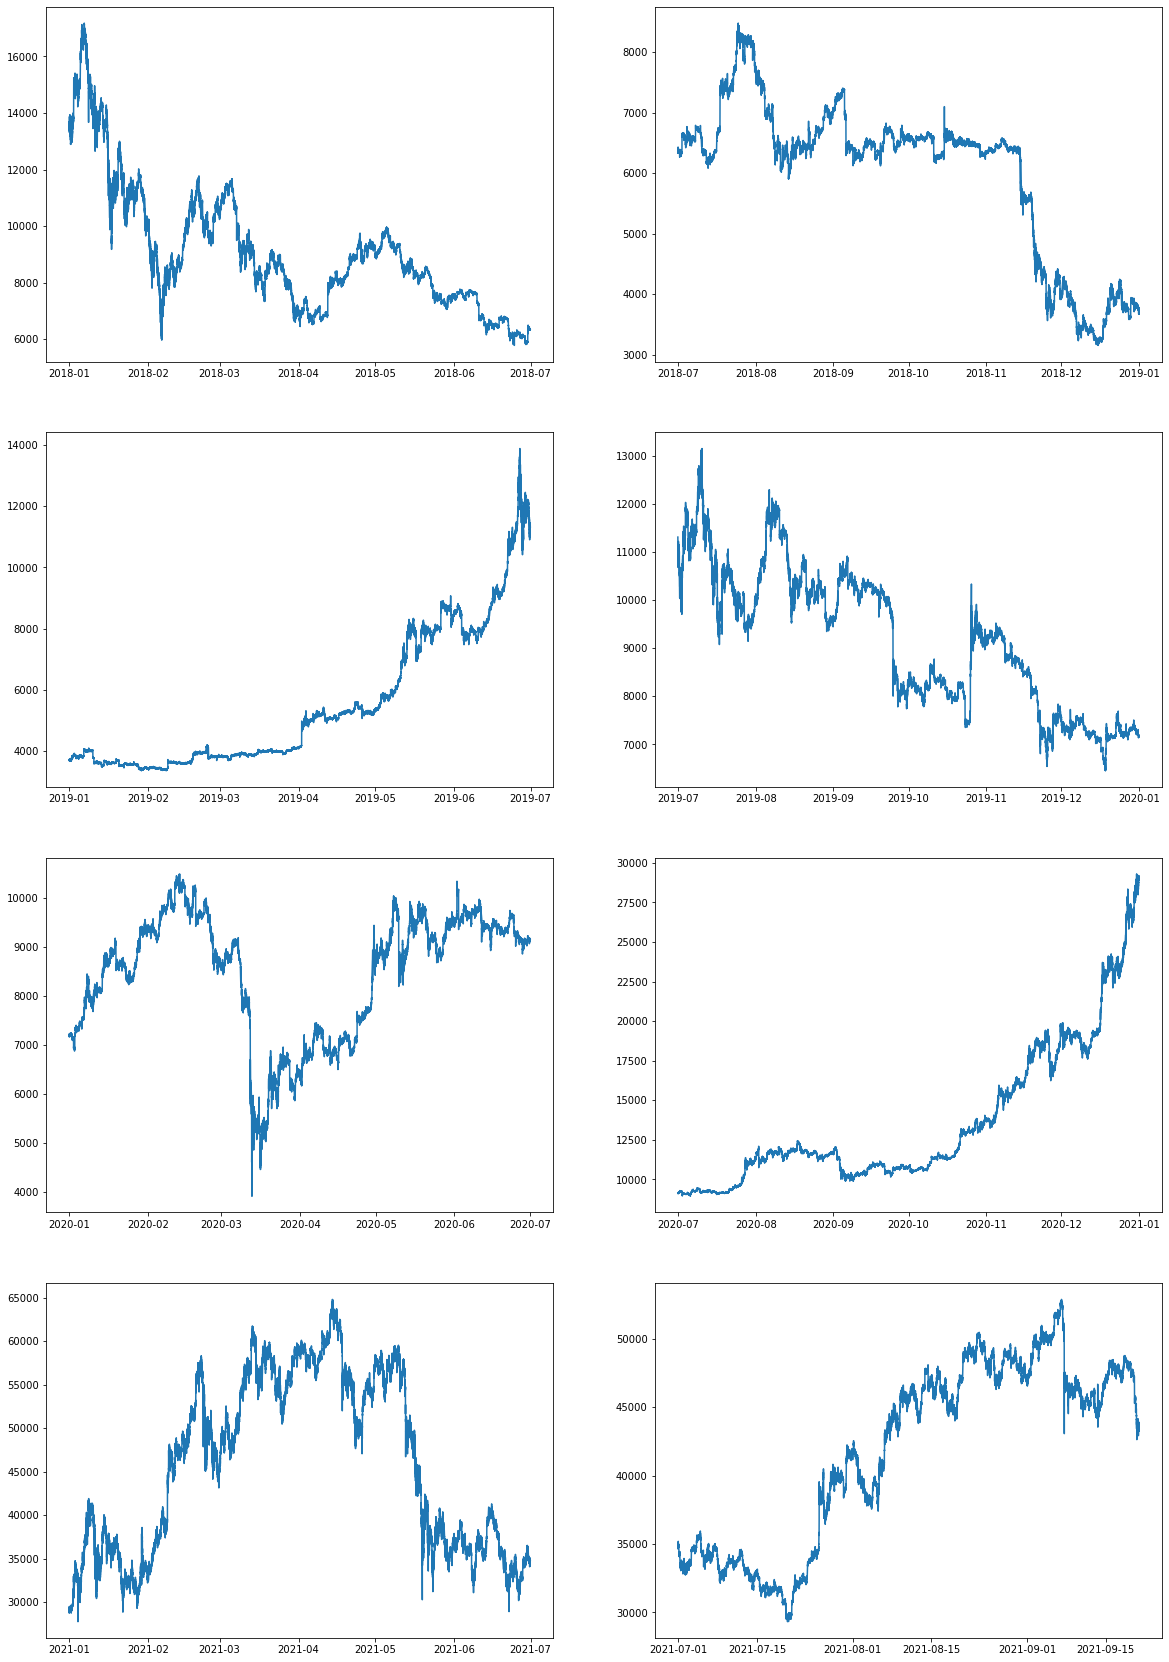

In [5]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

starting_date = btc.Time.iloc[0]
timesplits = [starting_date + i * relativedelta(months = 6) for i in range(8)] + [btc.Time.iloc[-1]]


import matplotlib.pyplot as plt

# Subplots are organized in a Rows x Cols Grid
# Tot and Cols are known
Tot = len(timesplits) - 1
Cols = 2

# Compute Rows required
Rows = Tot // Cols 
Rows += Tot % Cols

# Create a Position index
Position = range(1,Tot + 1)

# Create main figure
fig = plt.figure(1)
fig.set_figheight(30)
fig.set_figwidth(20)

for k in range(Tot):
  # add every single subplot to the figure with a for loop
    btc_tmp = btc.loc[datetime.timestamp(timesplits[k]):datetime.timestamp(timesplits[k+1])]
    ax = fig.add_subplot(Rows,Cols,Position[k])
    ax.plot(btc_tmp.Time, btc_tmp.Close)

plt.show()

# Generation of Technical Indicators

In the following chapter we will generate some technical indicators to use in our models. We do this here for the Bitcoin currency.

To do so we need the following package: 

(In this step you should be more precise regarding your package choice, extend your explanation with details that explain why you have chosen that specific package. This is not necessary for packages like pandas or numpy but would be necessary for something like ta) 

The technical Analysis library, which can be used to do feature engineering from financial datasets containing time series data. 

We first seperate the code into two Cells as the first one is solely used to install the ta package.


Now that the package is installed, we generate a variable that only contains the information about bitcoin. We therefore extract every row from the data variable that contains the Asset_ID corresponding to Bitcoin, set the index as timestamp and create a btc variable. 

Then we split our dataset into two sets test and training. We use a 70/30 approach for this. (Here you should obviously explain why you are choosing this approach)

Afterwards we calculate some technical indicators (you should obviously explain why you have chosen the indicators that you are using). 

We have chosen one momentum Indicator in form of the Rate of Change (ROC). The Rate-of-Change (ROC) indicator, which is also referred to as simply Momentum, is a pure momentum oscillator that measures the percent change in price from one period to the next. The ROC calculation compares the current price with the price “n” periods ago. The plot forms an oscillator that fluctuates above and below the zero line as the Rate-of-Change moves from positive to negative. As a momentum oscillator, ROC signals include centerline crossovers, divergences and overbought-oversold readings. Divergences fail to foreshadow reversals more often than not, so this article will forgo a detailed discussion on them. Even though centerline crossovers are prone to whipsaw, especially short-term, these crossovers can be used to identify the overall trend. Identifying overbought or oversold extremes comes naturally to the Rate-of-Change oscillator. 

We have chosen one volume Indicator in form of the Chaikin Money Flow (CMF). It measures the amount of Money Flow Volume over a specific period.

We have also chosen one volatility indicator in form of the Average True Range (ATR). The indicator provides an indication of the degree of price volatility. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.

For all the indicators we use the same window of 5 Timesteps. (You also need to explain why you are using the timesteps that you are using in this example)
Because we are using five timesteps it the first five rows can not contain any data. Therefore we drop these rows from our example. 

In [6]:
#Split the data

#Training data
start_train, end_train = datetime.timestamp(timesplits[-9]), datetime.timestamp(timesplits[-3])
train_data = btc.loc[start_train:end_train][3600:]

#Validation data
start_val, end_val = datetime.timestamp(timesplits[-3]), datetime.timestamp(timesplits[-2])
val_data = btc.loc[start_val:end_val][3600:]

#Test Data
start_val, end_val = datetime.timestamp(timesplits[-2]), datetime.timestamp(timesplits[-1])
test_data = btc.loc[start_test:end_test][3600:]

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28909 sha256=f2209e5c66941c14d26b5e59d9eab91b0f52fad3b160d556ca4c1bf90c661021
  Stored in directory: c:\users\micha\appdata\local\pip\cache\wheels\c4\71\30\9b87e7cc8350a4226ffbed6e4a6a923ac720845398895eb35d
Successfully built ta


In [132]:
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low

#Training Data
train_data['close_1'] = train_data.Close.diff()
train_data['close_15'] = train_data.Close.diff(15)
train_data['close_60'] = train_data.Close.diff(60)

train_data['count_1'] = train_data.Count.diff()
train_data['count_15'] = train_data.Count.diff(15)
train_data['count_60'] = train_data.Count.diff(60)

train_data['volume_1'] = train_data.Volume.diff()
train_data['volume_15'] = train_data.Volume.diff(15)
train_data['volume_60'] = train_data.Volume.diff(60)

train_data['upper_shadow'] = upper_shadow(train_data)
train_data['lower_shadow'] = lower_shadow(train_data)

train_data = ta.add_all_ta_features(train_data,
                                       open = 'Open',
                                       high = 'High',
                                       low = 'Low',
                                       close = 'Close',
                                       volume = 'Volume',
                                       fillna = False)
#Validation Data
val_data['close_1'] = val_data.Close.diff()
val_data['close_15'] = val_data.Close.diff(15)
val_data['close_60'] = val_data.Close.diff(60)

val_data['count_1'] =val_data.Count.diff()
val_data['count_15'] = val_data.Count.diff(15)
val_data['count_60'] = val_data.Count.diff(60)

val_data['volume_1'] = val_data.Volume.diff()
val_data['volume_15'] = val_data.Volume.diff(15)
val_data['volume_60'] = val_data.Volume.diff(60)

val_data['upper_shadow'] = upper_shadow(val_data)
val_data['lower_shadow'] = lower_shadow(val_data)

val_data = ta.add_all_ta_features(val_data,
                                       open = 'Open',
                                       high = 'High',
                                       low = 'Low',
                                       close = 'Close',
                                       volume = 'Volume',
                                       fillna = False)


#Testing Data
test_data['close_1'] = test_data.Close.diff()
test_data['close_15'] = test_data.Close.diff(15)
test_data['close_60'] = test_data.Close.diff(60)

test_data['count_1'] = test_data.Count.diff()
test_data['count_15'] = test_data.Count.diff(15)
test_data['count_60'] = test_data.Count.diff(60)

test_data['volume_1'] = test_data.Volume.diff()
test_data['volume_15'] = test_data.Volume.diff(15)
test_data['volume_60'] = test_data.Volume.diff(60)

test_data['upper_shadow'] = upper_shadow(test_data)
test_data['lower_shadow'] = lower_shadow(test_data)

test_data = ta.add_all_ta_features(test_data,
                                       open = 'Open',
                                       high = 'High',
                                       low = 'Low',
                                       close = 'Close',
                                       volume = 'Volume',
                                       fillna = False)

# delete variables with many missing values
train_data = train_data.drop(train_data.columns[train_data.isnull().sum() > 100], axis = 1)

val_data = val_data.drop(val_data.columns[val_data.isnull().sum() > 100], axis = 1)

test_data = test_data.drop(test_data.columns[test_data.isnull().sum() > 100], axis = 1)


find_corr_features = train_data.drop(['Asset_ID', 'Time', 'Weight'], axis = 1).corr(method = 'spearman')['Target'].abs().sort_values(ascending = False)
find_corr_features[1:21]

<ipython-input-132-152cce2aff0d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ROC'] = ROC.roc()
<ipython-input-132-152cce2aff0d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ROC'] = ROC.roc()
<ipython-input-132-152cce2aff0d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

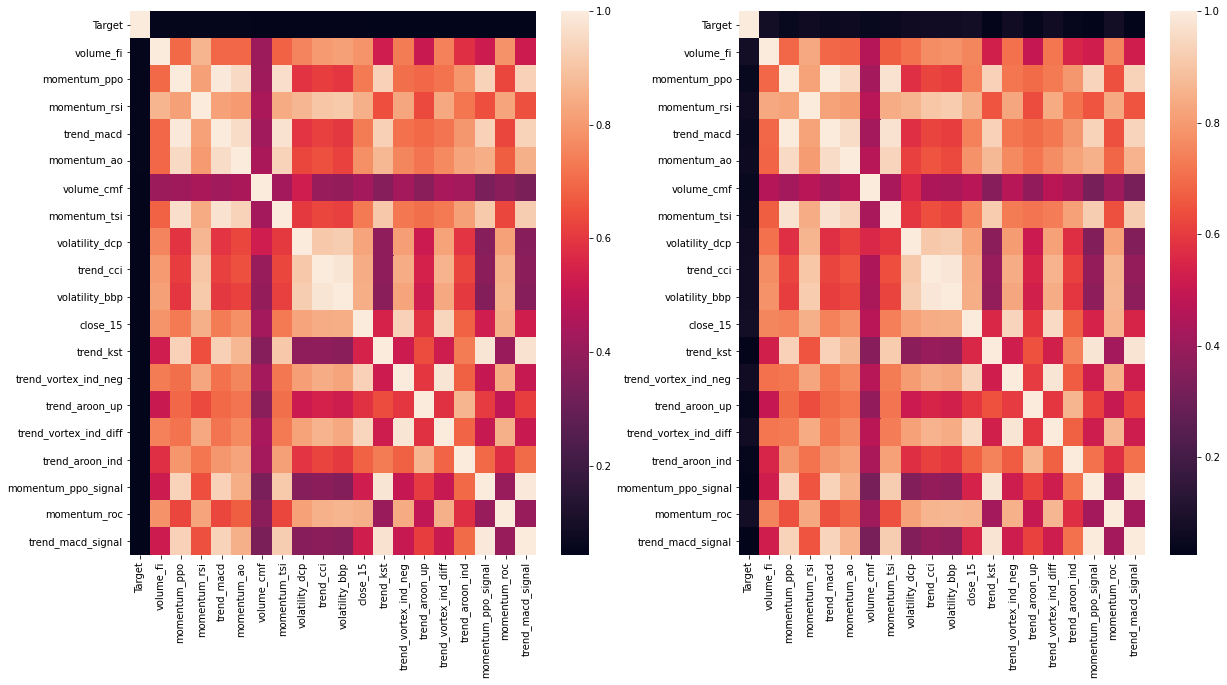

In [8]:
import seaborn as sns

train_data.dropna(inplace = True)
val_data.dropna(inplace = True)
test_data.dropna(inplace = True)

use_features = list(find_corr_features[:20].index)

fig, axs = plt.subplots(1, 3, figsize = (15, 7))
sns.heatmap(train_data[use_features].corr(method = 'spearman').abs(), ax = axs[0])
sns.heatmap(val_data[use_features].corr(method = 'spearman').abs(), ax = axs[0])
sns.heatmap(test_data[use_features].corr(method = 'spearman').abs(), ax = axs[1])
plt.show()

# Scaling of the data

Our Data contains a wide variety of data that is based on different scales. For our neural network it is necessary to work with the same scale over every feature or target variable. 

To scale the data we are using the sklearn package, to be more precise the sklearn.preprocessing.MinMaxScaler method. This transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, as in this case zero and one. Before we can do that we need to drop the columns that contains non numerical data and the datetime datatype. After dropping the columns, we then transform the feature values. 

In [10]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler(feature_range = (0, 1))
X_train = train_data[use_features].drop(['Target'], axis = 1)
X_val = val_data[use_features].drop(['Target'], axis = 1)
X_test = test_data[use_features].drop(['Target'], axis = 1)

y_train = train_data['Target'].values
y_test = test_data['Target'].values
y_val = val_data['Target'].values

X_train_ = X_scaler.fit_transform(X_train)
X_test_ = X_scaler.transform(X_test)
X_val_ = X_scaler.transform(X_val)

# Generating a neural network and Specifyig the Baseline Model

Now that our data is prepared, we have generated our additional feature variables in form of technical indicators and our data is scaled to a uniformed scale we can start generating our neural network.

For the design of our neural network we are using the tensorflow package. Because we also want to plot our loss functions we need matplotlib.

> Tensorflow is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.

> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

We therefore import the tensorflow library into our code. Because we also want to use matplotlib we import the library into our code. 

We then create an input layer that has an input shape equally to the amount of columns of our data set or in other words the amount of features.

We then add a fully connected dense layer with 64 hidden neurons and a rectified linear unit (relu) activation function. (why?)

>The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 

We then add another hidden layer with 32 hidden neurons and use the selu activation function. (why?)

>The Scaled Exponential Linear Unit (SELU) activation function is defined as:

>if x > 0: return scale * x

>if x < 0: return scale * alpha * (exp(x) - 1)

>where alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098).

>Basically, the SELU activation function multiplies scale (> 1) with the output of the tf.keras.activations.elu function to ensure a slope larger than one for positive inputs.
The values of alpha and scale are chosen so that the mean and variance of the inputs are preserved between two consecutive layers as long as the weights are initialized correctly and the number of input units is "large enough".

As our last layer we add another densly connected layer that uses a linear activation function and returns exactly one output value. (you obviously should get into more detail regarding your choice for the architecture) 

As our next step we compile our network with the mean absolute error loss function and the adam optimizer. 

>The mean absolute error computes the mean of absolute difference between labels and predictions. 

>Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

We afterwards fit our model with 15 epochs (why?) and a batch_size of 10000 (why?).
In the end we plot our loss and validation losses to see their courses.

To understand the real performance of our model we use scatterplots to display the drifting apart of the prediction and the real values. Additionaly we calculate the correlation between both values. 

In [ ]:

import matplotlib.pyplot as plt

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (X_train_.shape[1])),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation = 'selu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mean_absolute_error', optimizer = 'adam')
history = model.fit(X_train_, y_train, epochs = 15, batch_size = 100000, validation_data = (X_test_, y_test))
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12,8))

axs[0].scatter(model.predict(X_train_).flatten(), y_train)
axs[1].scatter(model.predict(X_test_).flatten(), y_test)
plt.show()
print(np.corrcoef(model.predict(X_train_).flatten(), y_train)[0, 1])
print(np.corrcoef(model.predict(X_test_).flatten(), y_test)[0, 1])

# Hyperparameter Search
Now we use the Hyperparameter Search to optimize the parameters before specifying the NN.  We tune Model hyperparameters that influence model architecture (e.g., number and width of hidden layers) and algorithm hyperparameters that influence the speed and quality of training (e.g., learning rate and activation function). The number of hyperparameter combinations can grow insanely large causing a manual search for an optimal set simply not feasible nor scalable. Therefore we use Keras Tuner to automate the search. 


In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

print(f"TensorFlow Version: {tf.__version__}")
print(f"KerasTuner Version: {kt.__version__}")
print(f"Keras Version: {keras.__version__}")

In [ ]:
# Number of epochs
NUM_EPOCHS = 5

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    
    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 5
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 6)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu")
            )
        
        # Tune dropout layer with values from 0 - 0.3 with stepsize of 0.1.
        model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))
    
    # Add output layer.
    model.add(keras.layers.Dense(units=10, activation="softmax"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=["accuracy"])
    
    return model


In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective="val_accuracy",
                     max_epochs=5,
                     factor=3,
                     hyperband_iterations=10,
                     directory="kt_dir2",
                     project_name="kt_hyperband",)

# Display search space summary
tuner.search_space_summary()

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_val, y_val, epochs=NUM_EPOCHS, validation_split=0.2, callbacks=[stop_early], verbose=2)

# Get the optimal hyperparameters from the results
best_hps=tuner.get_best_hyperparameters()[0]

# Specify the optimized model
use the parameters from the hyperparameter search

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (X_train_.shape[1])),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation = 'selu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mean_absolute_error', optimizer = 'adam')
history = model.fit(X_train_, y_train, epochs = 15, batch_size = 100000, validation_data = (X_test_, y_test))
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12,8))

axs[0].scatter(model.predict(X_train_).flatten(), y_train)
axs[1].scatter(model.predict(X_test_).flatten(), y_test)
plt.show()
print(np.corrcoef(model.predict(X_train_).flatten(), y_train)[0, 1])
print(np.corrcoef(model.predict(X_test_).flatten(), y_test)[0, 1])

# Comparison Baseline Model and Optimized Model

# Making forecasts with the optimized model

Now that we have generated our model we want to test our model performance.
Therefore we predict values with our model on the basis of our data_eval. Therefore we need to adjust our varible to the bitcon_eval. We then generate the same technical indicators as for the training and test data and then prepare the data for our prediction, this means excluding string columns and the target variable. Then to show the performance we use a scatterplot and calculate the correleation between the predicitons and the real values.

In [ ]:
btc_eval = data_eval[data_eval.Asset_ID == 1]
btc_eval.set_index('timestamp', inplace = True)

ROC = ta.momentum.ROCIndicator(close = btc_eval['Close'],window = 5,fillna=False)
btc_eval['ROC'] = ROC.roc()

CMF =ta.volume.ChaikinMoneyFlowIndicator(close = btc_eval['Close'],high = btc_eval['High'], low = btc_eval['Low'], volume = btc_eval['Volume'], window = 5,fillna=False)
btc_eval['CMF'] = CMF.chaikin_money_flow()

AVR =ta.volatility.AverageTrueRange(close = btc_eval['Close'],high = btc_eval['High'], low = btc_eval['Low'], window = 5,fillna=False)
btc_eval['AVR'] = AVR.average_true_range()

btc_eval.dropna(inplace = True)

X_eval = btc_eval.drop(['Asset_ID','Time','Weight','Asset_Name','Target'], axis = 1)
X_eval_ = X_scaler.transform(X_eval)
y_eval = btc_eval['Target'].values

plt.scatter(model.predict(X_eval_).flatten(), y_eval)
plt.show()
print(np.corrcoef(model.predict(X_eval_).flatten(), y_eval)[0, 1])

# Discussing the results

As we can see in our scatterplot our values of the prediction (x-axis) move on a far bigger span (-0.075 to 0.125) than the values of the real targets (-0.02 to 0.06). Additionally our predictions tend to be around -0.025 and -0.075 in most cases, values which are below the lowest real value. Meanwhile the real values tend to be between -0.02 and 0.02 most of the time. These differences in values are also confirmed by our correlation coefficient which is basically 0.02. (Here you should also go into far more detail regarding your results, as this is just an example for your understanding) .